In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random
import scipy.stats

In [2]:
def TDT(n):
    b = n[0] + n[2] + 2*n[3]
    c = n[1] + n[2] + 2*n[4]
    
    if b == 0 and c == 0:
        return 0
    else:
        return (b-c)**2/(b+c)

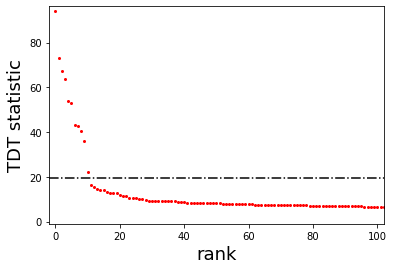

In [3]:
N = 150; M = 5000
S = np.zeros(M)
b = np.zeros(M)
c = np.zeros(M)
n = np.zeros((M,6))
    
for i in range(M-10):
    S[i] = 2*N
    n[i][0] = np.random.binomial(S[i],1/6)
    n[i][1] = np.random.binomial((S[i]-n[i][0]), 1/5)
    n[i][2] = np.random.binomial((S[i]-n[i][0]-n[i][1]), 1/4)
    n[i][3] = np.random.binomial((S[i]-n[i][0]-n[i][1]-n[i][2]), 1/3)
    n[i][4] = np.random.binomial((S[i]-n[i][0]-n[i][1]-n[i][2]-n[i][3]), 1/2)
    n[i][5] = S[i]-n[i][0]-n[i][1]-n[i][2]-n[i][3]-n[i][4]
    
for i in range(M-10,M):
    S[i] = 2*N
    n[i][0] = np.random.binomial(S[i],1/4)
    n[i][1] = np.random.binomial((S[i]-n[i][0]), 1/8)
    n[i][2] = np.random.binomial((S[i]-n[i][0]-n[i][1]), 1/4)
    n[i][3] = np.random.binomial((S[i]-n[i][0]-n[i][1]-n[i][2]), 1/2)
    n[i][4] = np.random.binomial((S[i]-n[i][0]-n[i][1]-n[i][2]-n[i][3]), 1/3)
    n[i][5] = S[i]-n[i][0]-n[i][1]-n[i][2]-n[i][3]-n[i][4]

stats = np.zeros(M)
order = np.zeros(M)

for i in range(M):
    order[i] = i
    stats[i] = TDT(n[i])

x = np.argsort(stats)

nn = np.zeros((M,6))
for i in range(M):
    nn[i] = n[x[M-1-i]]

sorted_stats = sorted(stats, reverse=True)
#print(sorted_stats)

fig = plt.figure()
plt.ylim(-1, max(stats)+2)
plt.xlim(-2, 102)
plt.plot(order, sorted_stats, marker="o", markersize=2, color = "red", linestyle = "None")
plt.axhline(19.5, color = "black", linestyle = "-.")
plt.xlabel("rank", fontsize = 18)
plt.ylabel("TDT statistic", fontsize = 18)
fig.savefig("TDT_stats.png")
fig.savefig("figs/TDT_stats.eps")